In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('titanic.csv',usecols=['Age','Cabin','Survived','Embarked'])

In [3]:
data.head()

,Survived,Age,Cabin,Embarked
0,0,22.0,NaN,S
1,1,38.0,C85,C
2,1,26.0,NaN,S
3,1,35.0,C123,S
4,0,35.0,NaN,S


In [4]:
data.isnull().sum()

Survived      0
Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
data.shape

(891, 4)

In [6]:
data[data['Embarked'].isnull()]

,Survived,Age,Cabin,Embarked
61,1,38.0,B28,NaN
829,1,62.0,B28,NaN


In [7]:
data['Embarked'].isnull().sum()

2

In [8]:
data['cabin_null']=np.where(data['Cabin'].isnull(),1,0)

In [9]:
data.columns

Index(['Survived', 'Age', 'Cabin', 'Embarked', 'cabin_null'], dtype='object')

In [10]:
data.head()

,Survived,Age,Cabin,Embarked,cabin_null
0,0,22.0,NaN,S,1
1,1,38.0,C85,C,0
2,1,26.0,NaN,S,1
3,1,35.0,C123,S,0
4,0,35.0,NaN,S,1


In [11]:
data['cabin_null'].head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_null, dtype: int32

In [12]:
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [13]:
data1=data.fillna(data['cabin_null'].median())

In [14]:
data1.head()

,Survived,Age,Cabin,Embarked,cabin_null
0,0,22.0,1,S,1
1,1,38.0,C85,C,0
2,1,26.0,1,S,1
3,1,35.0,C123,S,0
4,0,35.0,1,S,1


In [15]:
df=pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])

In [16]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [18]:
data=df.fillna(df.Age.median())

In [19]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [20]:
df['age_median']=df['Age'].fillna(df.Age.median())

In [21]:
df.head()

,Survived,Age,Fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [22]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
age_median      0
dtype: int64

In [23]:
df['Age'].dropna().sample()

659    58.0
Name: Age, dtype: float64

In [24]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [25]:
ran=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [26]:
ran.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [30]:
df['age']=df['Age']

In [34]:
ran.index=df[df['Age'].isnull()].index

In [35]:
df.loc[df['Age'].isnull(),'age']=ran

In [36]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
age_median      0
age             0
dtype: int64

In [37]:
df.head()

,Survived,Age,Fare,age_median,age
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [40]:
df['nan']=np.where(df['Age'].isnull(),1,0)

In [41]:
df.head()

,Survived,Age,Fare,age_median,age,nan
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0


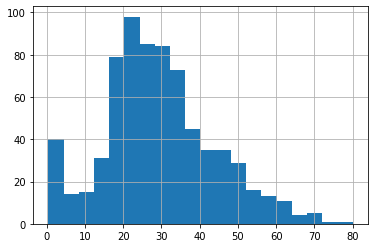

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

df.Age.hist(bins=20)

In [45]:
extreme=df.Age.mean()+3*df.Age.std()

In [46]:
extreme

73.27860964406095

In [48]:
df['Age_ex']=df['Age'].fillna(extreme)

In [49]:
df.head()

,Survived,Age,Fare,age_median,age,nan,Age_ex
0,0,22.0,7.2500,22.0,22.0,0,22.0
1,1,38.0,71.2833,38.0,38.0,0,38.0
2,1,26.0,7.9250,26.0,26.0,0,26.0
3,1,35.0,53.1000,35.0,35.0,0,35.0
4,0,35.0,8.0500,35.0,35.0,0,35.0


In [51]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
age_median    0
age           0
nan           0
Age_ex        0
dtype: int64

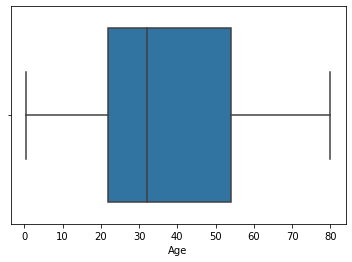

In [50]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [54]:
data=pd.read_csv('titanic.csv',usecols=['Survived','Cabin','Embarked'])

In [56]:
data.head()

,Survived,Cabin,Embarked
0,0,NaN,S
1,1,C85,C
2,1,NaN,S
3,1,C123,S
4,0,NaN,S


In [57]:
data.isnull().sum()

Survived      0
Cabin       687
Embarked      2
dtype: int64

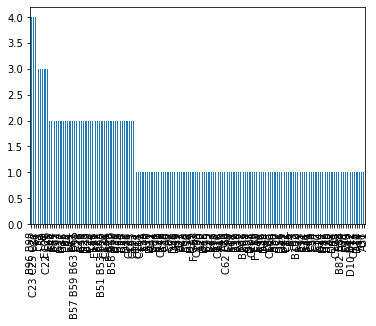

In [60]:
data['Cabin'].value_counts().plot.bar()

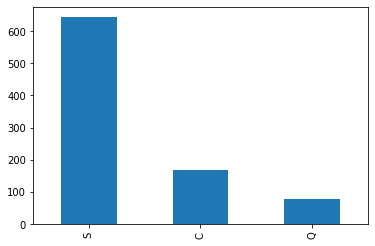

In [61]:
data['Embarked'].value_counts().plot.bar()

In [62]:
data['Cabin'].value_counts().index[0]

'B96 B98'

In [63]:
data['Cabin'].mode()[0]

'B96 B98'

In [64]:
data['Cabinn']=data['Cabin'].fillna('B96')

In [65]:
data.head()

,Survived,Cabin,Embarked,Cabinn
0,0,NaN,S,B96
1,1,C85,C,C85
2,1,NaN,S,B96
3,1,C123,S,C123
4,0,NaN,S,B96
